# Webscrape 1

In [336]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import time
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException

In [338]:
# pkl.dump([], open('test.p','wb'))

In [339]:
root_url ='https://www.carspecs.us'

In [340]:
# refise rear and front suspension fearures no 54

# Initial Data Cleaning - Eliminating Duplicates, Creating Uniform Classes and Transforming Numbers to Floats and Integers

In [341]:
df_reg = pkl.load(open('df_pickles/df_reg.p','rb'))

In [173]:
pkl.dump(df_reg, open('df_pickles/df_reg.p','wb'))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [ ]:
# pkl.dump([], open('test.p','wb'))

In [ ]:
df.at['/cars/2019/acura/ilx/79088', '0-60 mph']

In [342]:
df_reg

,model_name_carspecs.us,price,Passenger Doors,Passenger Capacity,Base engine size,Cylinders,Fuel tank capacity,EPA mileage (combined),Engine type,Horsepower,...,Front track,Rear track,Front Brakes,Front Suspension Type,Front Tire Size,Front Wheel Diameter,Rear Suspension Type,Rear Tire Size,Rear Wheel Diameter,extra_options
/cars/2019/acura/ilx/79088,2019 Acura ILX Sedan,25900,4,5,2.4,4,13.2,28,Gas,201,...,59.4,60.2,Front Disc Brakes,Independent MacPherson Strut,P215/45VR17,17,Independent Multi-Link,P215/45VR17,17,NaN
/cars/2019/acura/ilx/79090,2019 Acura ILX Sedan w/Premium Pkg,27650,4,5,2.4,4,13.2,28,Gas,201,...,59.4,60.2,Front Disc Brakes,Independent MacPherson Strut,P215/45VR17,17,Independent Multi-Link,P215/45VR17,17,NaN
/cars/2019/acura/ilx/79089,2019 Acura ILX Sedan w/Premium/A-Spec Pkg,29650,4,5,2.4,4,13.2,28,Gas,201,...,59.4,60.2,Front Disc Brakes,Independent MacPherson Strut,P225/40VR18,18,Independent Multi-Link,P225/40VR18,18,NaN
/cars/2019/acura/ilx/79092,2019 Acura ILX Sedan w/Technology Pkg,29550,4,5,2.4,4,13.2,28,Gas,201,...,59.4,60.2,Front Disc Brakes,Independent MacPherson Strut,P215/45VR17,17,Independent Multi-Link,P215/45VR17,17,NaN
/cars/2019/acura/ilx/79091,2019 Acura ILX Sedan w/Technology/A-Spec Pkg,31550,4,5,2.4,4,13.2,28,Gas,201,...,59.4,60.2,Front Disc Brakes,Independent MacPherson Strut,P225/40VR18,18,Independent Multi-Link,P225/40VR18,18,NaN
/cars/2019/acura/mdx/77624,2019 Acura MDX FWD,44300,4,7,3.5,6,19.5,23,Gas,290,...,66.3,66.3,Front Disc Brakes,Independent MacPherson Strut,P245/60HR18,18,Independent Multi-Link,P245/60HR18,18,NaN
/cars/2019/acura/mdx/77621,2019 Acura MDX FWD w/Advance Pkg,56050,4,6,3.5,6,19.5,23,Gas,290,...,66.3,66.3,Front Disc Brakes,Independent MacPherson Strut,P265/45HR20,20,Independent Multi-Link,P265/45HR20,20,NaN
/cars/2019/acura/mdx/77620,2019 Acura MDX FWD w/Advance/Entertainment Pkg,58050,4,7,3.5,6,19.5,23,Gas,290,...,66.3,66.3,Front Disc Brakes,Independent MacPherson Strut,P265/45HR20,20,Independent Multi-Link,P265/45HR20,20,NaN
/cars/2019/acura/mdx/77623,2019 Acura MDX FWD w/Technology Pkg,49300,4,7,3.5,6,19.5,23,Gas,290,...,66.3,66.3,Front Disc Brakes,Independent MacPherson Strut,P245/50HR20,20,Independent Multi-Link,P245/50HR20,20,NaN
/cars/2019/acura/mdx/77622,2019 Acura MDX FWD w/Technology/Entertainment ...,51300,4,6,3.5,6,19.5,23,Gas,290,...,66.3,66.3,Front Disc Brakes,Independent MacPherson Strut,P245/50HR20,20,Independent Multi-Link,P245/50HR20,20,NaN


In [350]:
df_reg.isna().sum()

model_name_carspecs.us                      0
price                                       0
Passenger Doors                            31
Passenger Capacity                         31
Base engine size                           66
Cylinders                                  67
Fuel tank capacity                         68
EPA mileage (combined)                    895
Engine type                                 2
Horsepower                                 32
Horsepower RPM                             66
Torque                                     41
Torque RPM                                141
Drive type                                  0
Transmission                              323
First Gear Ratio                          275
Second Gear Ratio                         297
Third Gear Ratio                          300
Fourth Gear Ratio                         300
Fifth Gear Ratio                          306
Sixth Gear Ratio                          359
Seventh Gear Ratio                

In [344]:
df_reg.columns

Index(['model_name_carspecs.us', 'price', 'Passenger Doors',
       'Passenger Capacity', 'Base engine size', 'Cylinders',
       'Fuel tank capacity', 'EPA mileage (combined)', 'Engine type',
       'Horsepower', 'Horsepower RPM', 'Torque', 'Torque RPM', 'Drive type',
       'Transmission', 'First Gear Ratio', 'Second Gear Ratio',
       'Third Gear Ratio', 'Fourth Gear Ratio', 'Fifth Gear Ratio',
       'Sixth Gear Ratio', 'Seventh Gear Ratio', 'Eighth Gear Ratio',
       'Ninth Gear Ratio', 'third_row_seating', 'first_row_seating',
       'rear_row_seating', 'Curb weight',
       'Dead Weight Hitch - Max Tongue Weight',
       'Dead Weight Hitch - Max Trailer Weight', 'Height', 'Length',
       'Wheelbase', 'Width', 'Front track', 'Rear track', 'Front Brakes',
       'Front Suspension Type', 'Front Tire Size', 'Front Wheel Diameter',
       'Rear Suspension Type', 'Rear Tire Size', 'Rear Wheel Diameter',
       'extra_options'],
      dtype='object')

In [345]:
for i in df_reg[(df_reg['Sixth Gear Ratio'] > 0)].index:
    if (type(df_reg.at[i, 'EPA mileage (combined)']) == type(np.nan)):
        df_reg.at[i,'Seventh Gear Ratio'] =0
        df_reg.at[i,'Eighth Gear Ratio'] =0
        df_reg.at[i,'Ninth Gear Ratio'] =0

In [346]:
df_reg['Ninth Gear Ratio'].fillna(value=0,axis=0,inplace=True)

In [347]:
df_reg['Eighth Gear Ratio'].fillna(value=0,axis=0,inplace=True)

In [348]:
df_reg['Seventh Gear Ratio'].fillna(value=0,axis=0,inplace=True)

In [349]:
df_reg[(df_reg['Sixth Gear Ratio'] > 0)].isna().sum();

In [27]:
for i in df_reg[(df_reg['Fifth Gear Ratio'] > 0)].index:
    if (type(df_reg.at[i, 'EPA mileage (combined)']) == type(np.nan)):
        df_reg.at[i,'Sixth Gear Ratio'] = 0
        df_reg.at[i,'Seventh Gear Ratio'] =0
        df_reg.at[i,'Eighth Gear Ratio'] =0
        df_reg.at[i,'Ninth Gear Ratio'] =0

In [57]:
df_reg[['Sixth Gear Ratio','Seventh Gear Ratio','Eighth Gear Ratio','Ninth Gear Ratio']].fillna(value=0,axis=1,inplace=True)

# KNN interpolation average

In [24]:
df_reg[(df_reg['Fifth Gear Ratio'] > 0)][['Sixth Gear Ratio', 'Seventh Gear Ratio', 'Eighth Gear Ratio', 'Ninth Gear Ratio']].fillna(value=0,axis=0,inplace=True)

In [388]:
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
 

In [419]:
df_no_nan = pd.concat([df_reg[['Cylinders', 'Base engine size']] ,df_reg[['Passenger Doors']]], axis=1)

In [420]:
df_no_nan = df_no_nan.dropna()

In [421]:
df_no_nan

,Cylinders,Base engine size,Passenger Doors
/cars/2019/acura/ilx/79088,4,2.4,4
/cars/2019/acura/ilx/79090,4,2.4,4
/cars/2019/acura/ilx/79089,4,2.4,4
/cars/2019/acura/ilx/79092,4,2.4,4
/cars/2019/acura/ilx/79091,4,2.4,4
/cars/2019/acura/mdx/77624,6,3.5,4
/cars/2019/acura/mdx/77621,6,3.5,4
/cars/2019/acura/mdx/77620,6,3.5,4
/cars/2019/acura/mdx/77623,6,3.5,4
/cars/2019/acura/mdx/77622,6,3.5,4


In [425]:
X_ = df_no_nan[['Cylinders', 'Base engine size']]
y_ = df_no_nan['Passenger Doors']

In [426]:
X_.shape, y_.shape

((2173, 2), (2173,))

In [429]:
y_

/cars/2019/acura/ilx/79088     4
/cars/2019/acura/ilx/79090     4
/cars/2019/acura/ilx/79089     4
/cars/2019/acura/ilx/79092     4
/cars/2019/acura/ilx/79091     4
/cars/2019/acura/mdx/77624     4
/cars/2019/acura/mdx/77621     4
/cars/2019/acura/mdx/77620     4
/cars/2019/acura/mdx/77623     4
/cars/2019/acura/mdx/77622     4
/cars/2019/acura/mdx/77619     4
/cars/2019/acura/mdx/77625     4
/cars/2019/acura/mdx/77626     4
/cars/2019/acura/mdx/77628     4
/cars/2019/acura/mdx/77627     4
/cars/2019/acura/mdx/77631     4
/cars/2019/acura/mdx/77629     4
/cars/2019/acura/mdx/77630     4
/cars/2019/acura/nsx/79093     2
/cars/2019/acura/rdx/77635     4
/cars/2019/acura/rdx/77633     4
/cars/2019/acura/rdx/77632     4
/cars/2019/acura/rdx/77634     4
/cars/2019/acura/rdx/77639     4
/cars/2019/acura/rdx/77637     4
/cars/2019/acura/rdx/77636     4
/cars/2019/acura/rdx/77638     4
/cars/2019/acura/rlx/77640     4
/cars/2019/acura/rlx/79094     4
/cars/2019/acura/tlx/77649     4
          

In [427]:
neigh.fit(X_, y_)

ValueError: Unknown label type: 'unknown'

In [416]:
def knn_predictor(df,X,y):
    df_no_nan = pd.concat([df[X],df[y]],axis=1).dropna()
    X_ = df_no_nan[X]
    y_ = df_no_nan[y]
    neigh.fit(X_, list(np.array(y_).reshape(1,-1)[0]))
    return neigh.predict(df[df[y].isna()][y])

In [417]:
preds = knn_predictor(df_reg,['Cylinders', 'Base engine size'],['Passenger Doors'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [235]:
y

array([[4],
       [4],
       [4],
       ...,
       [4],
       [4],
       [4]], dtype=object)

In [283]:
len(df_reg[['Cylinders','Passenger Doors']])

2280

In [379]:
preds= neigh.predict(np.array(df_reg[(df_reg['Passenger Doors'].isna())]['Cylinders']).reshape(-1, 1))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [285]:
preds

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4])

In [232]:
neigh.predict(np.array(df_reg[(df_reg['Passenger Doors'].isna())]['Cylinders']).reshape(-1, 1))




array([[4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0],
       [4.0]], dtype=object)

In [97]:
df_knn = df_reg.copy()
df_knn.drop(['extra_options'],1,inplace=True)

In [90]:
def weighted_hamming(data):
    """ Compute weighted hamming distance on categorical variables. For one variable, it is equal to 1 if
        the values between point A and point B are different, else it is equal the relative frequency of the
        distribution of the value across the variable. For multiple variables, the harmonic mean is computed
        up to a constant factor.
        @params:
            - data = a pandas data frame of categorical variables
        @returns:
            - distance_matrix = a distance matrix with pairwise distance for all attributes
    """
    categories_dist = []
    
    for category in data:
        X = pd.get_dummies(data[category])
        X_mean = X * X.mean()
        X_dot = X_mean.dot(X.transpose())
        X_np = np.asarray(X_dot.replace(0,1,inplace=False))
        categories_dist.append(X_np)
    categories_dist = np.array(categories_dist)
    distances = hmean(categories_dist, axis=0)
    return distances


def distance_matrix(data, numeric_distance = "euclidean", categorical_distance = "jaccard"):
    """ Compute the pairwise distance attribute by attribute in order to account for different variables type:
        - Continuous
        - Categorical
        For ordinal values, provide a numerical representation taking the order into account.
        Categorical variables are transformed into a set of binary ones.
        If both continuous and categorical distance are provided, a Gower-like distance is computed and the numeric
        variables are all normalized in the process.
        If there are missing values, the mean is computed for numerical attributes and the mode for categorical ones.
        
        Note: If weighted-hamming distance is chosen, the computation time increases a lot since it is not coded in C 
        like other distance metrics provided by scipy.
        @params:
            - data                  = pandas dataframe to compute distances on.
            - numeric_distances     = the metric to apply to continuous attributes.
                                      "euclidean" and "cityblock" available.
                                      Default = "euclidean"
            - categorical_distances = the metric to apply to binary attributes.
                                      "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                      available. Default = "jaccard"
        @returns:
            - the distance matrix
    """
    possible_continuous_distances = ["euclidean", "cityblock"]
    possible_binary_distances = ["euclidean", "jaccard", "hamming", "weighted-hamming"]
    number_of_variables = data.shape[1]
    number_of_observations = data.shape[0]

    # Get the type of each attribute (Numeric or categorical)
    is_numeric = [all(isinstance(n, numbers.Number) for n in data.iloc[:, i]) for i, x in enumerate(data)]
    is_all_numeric = sum(is_numeric) == len(is_numeric)
    is_all_categorical = sum(is_numeric) == 0
    is_mixed_type = not is_all_categorical and not is_all_numeric

    # Check the content of the distances parameter
    if numeric_distance not in possible_continuous_distances:
        print ("The continuous distance " + numeric_distance + " is not supported.")
        return None
    elif categorical_distance not in possible_binary_distances:
        print ("The binary distance " + categorical_distance + " is not supported.")
        return None

    # Separate the data frame into categorical and numeric attributes and normalize numeric data
    if is_mixed_type:
        number_of_numeric_var = sum(is_numeric)
        number_of_categorical_var = number_of_variables - number_of_numeric_var
        data_numeric = data.iloc[:, is_numeric]
        data_numeric = (data_numeric - data_numeric.mean()) / (data_numeric.max() - data_numeric.min())
        data_categorical = data.iloc[:, [not x for x in is_numeric]]

    # Replace missing values with column mean for numeric values and mode for categorical ones. With the mode, it
    # triggers a warning: "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
    # but the value are properly replaced
    if is_mixed_type:
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for x in data_categorical:
            data_categorical[x].fillna(data_categorical[x].mode()[0], inplace=True)
    elif is_all_numeric:
        data.fillna(data.mean(), inplace=True)
    else:
        for x in data:
            data[x].fillna(data[x].mode()[0], inplace=True)

    # "Dummifies" categorical variables in place
    if not is_all_numeric and not (categorical_distance == 'hamming' or categorical_distance == 'weighted-hamming'):
        if is_mixed_type:
            data_categorical = pd.get_dummies(data_categorical)
        else:
            data = pd.get_dummies(data)
    elif not is_all_numeric and categorical_distance == 'hamming':
        if is_mixed_type:
            data_categorical = pd.DataFrame([pd.factorize(data_categorical[x])[0] for x in data_categorical]).transpose()
        else:
            data = pd.DataFrame([pd.factorize(data[x])[0] for x in data]).transpose()

    if is_all_numeric:
        result_matrix = cdist(data, data, metric=numeric_distance)
    elif is_all_categorical:
        if categorical_distance == "weighted-hamming":
            result_matrix = weighted_hamming(data)
        else:
            result_matrix = cdist(data, data, metric=categorical_distance)
    else:
        result_numeric = cdist(data_numeric, data_numeric, metric=numeric_distance)
        if categorical_distance == "weighted-hamming":
            result_categorical = weighted_hamming(data_categorical)
        else:
            result_categorical = cdist(data_categorical, data_categorical, metric=categorical_distance)
        result_matrix = np.array([[1.0*(result_numeric[i, j] * number_of_numeric_var + result_categorical[i, j] *
                               number_of_categorical_var) / number_of_variables for j in range(number_of_observations)] for i in range(number_of_observations)])

    # Fill the diagonal with NaN values
    np.fill_diagonal(result_matrix, np.nan)

    return pd.DataFrame(result_matrix)

In [98]:
weighted_hamming_df = weighted_hamming(df_knn)

In [100]:
distance_matrix_df=distance_matrix(df_knn, numeric_distance = "euclidean", categorical_distance = "jaccard")

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [193]:
def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
    """ Replace the missing values within the target variable based on its k nearest neighbors identified with the
        attributes variables. If more than 50% of its neighbors are also missing values, the value is not modified and
        remains missing. If there is a problem in the parameters provided, returns None.
        If to many neighbors also have missing values, leave the missing value of interest unchanged.
        @params:
            - target                        = a vector of n values with missing values that you want to impute. The length has
                                              to be at least n = 3.
            - attributes                    = a data frame of attributes with n rows to match the target variable
            - k_neighbors                   = the number of neighbors to look at to impute the missing values. It has to be a
                                              value between 1 and n.
            - aggregation_method            = how to aggregate the values from the nearest neighbors (mean, median, mode)
                                              Default = "mean"
            - numeric_distances             = the metric to apply to continuous attributes.
                                              "euclidean" and "cityblock" available.
                                              Default = "euclidean"
            - categorical_distances         = the metric to apply to binary attributes.
                                              "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                              available. Default = "jaccard"
            - missing_neighbors_threshold   = minimum of neighbors among the k ones that are not also missing to infer
                                              the correct value. Default = 0.5
        @returns:
            target_completed        = the vector of target values with missing value replaced. If there is a problem
                                      in the parameters, return None
    """

    # Get useful variables
    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)

    # Check for possible errors
    if number_observations < 3:
        print ("Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print ("The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print ("The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print ("The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print ("The only method allowed for categorical target variable is the mode.")
        return None

    # Make sure the data are in the right format
    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)

    # Get the distance matrix and check whether no error was triggered when computing it
    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None

    # Get the closest points and compute the correct aggregation method
    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            print(order)
            closest_to_target = target.iloc[order, :]
            print(closest_to_target)
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
            print(missing_neighbors)
            # Compute the right aggregation method if at least more than 50% of the closest neighbors are not missing
            if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
                continue
            elif aggregation_method == "mean":
                target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target, mask=np.isnan(closest_to_target)))
            elif aggregation_method == "median":
                target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target, mask=np.isnan(closest_to_target)))
            else:
                target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]

    return target

In [190]:
df_knn.columns

Index(['model_name_carspecs.us', 'price', 'Passenger Doors',
       'Passenger Capacity', 'Base engine size', 'Cylinders',
       'Fuel tank capacity', 'EPA mileage (combined)', 'Engine type',
       'Horsepower', 'Horsepower RPM', 'Torque', 'Torque RPM', 'Drive type',
       'Transmission', 'First Gear Ratio', 'Second Gear Ratio',
       'Third Gear Ratio', 'Fourth Gear Ratio', 'Fifth Gear Ratio',
       'Sixth Gear Ratio', 'Seventh Gear Ratio', 'Eighth Gear Ratio',
       'Ninth Gear Ratio', 'third_row_seating', 'first_row_seating',
       'rear_row_seating', 'Curb weight',
       'Dead Weight Hitch - Max Tongue Weight',
       'Dead Weight Hitch - Max Trailer Weight', 'Height', 'Length',
       'Wheelbase', 'Width', 'Front track', 'Rear track', 'Front Brakes',
       'Front Suspension Type', 'Front Tire Size', 'Front Wheel Diameter',
       'Rear Suspension Type', 'Rear Tire Size', 'Rear Wheel Diameter'],
      dtype='object')

In [191]:
np.ma.masked_array([5,6,7,8], mask=np.isnan(np.nan))

masked_array(data=[--, --, --, --],
             mask=[ True,  True,  True,  True],
       fill_value=999999,
            dtype=int64)

In [142]:
weighted_hamming_df

array([[0.00386011, 0.00790066, 0.00950947, ..., 0.69150934, 0.69150934,
        0.69150934],
       [0.00790066, 0.00350175, 0.00950947, ..., 0.69150934, 0.69150934,
        0.69150934],
       [0.00950947, 0.00950947, 0.00411476, ..., 0.69150934, 0.69150934,
        0.69150934],
       ...,
       [0.69150934, 0.69150934, 0.69150934, ..., 0.00503888, 0.01341091,
        0.01081587],
       [0.69150934, 0.69150934, 0.69150934, ..., 0.01341091, 0.00546108,
        0.01341091],
       [0.69150934, 0.69150934, 0.69150934, ..., 0.01081587, 0.01341091,
        0.00503888]])

In [206]:
knn_impute(df_knn['Passenger Doors'], attributes=df_knn['Engine type'], k_neighbors=10)

[   0 1504 1503 1502 1501 1500 1499 1498 1497 1496]
                                         Passenger Doors
/cars/2019/acura/ilx/79088                             4
/cars/2019/mercedes-benz/gla-class/78771               4
/cars/2019/mercedes-benz/gla-class/78769               4
/cars/2019/mercedes-benz/g-class/79658                 4
/cars/2019/mercedes-benz/g-class/79657                 4
/cars/2019/mercedes-benz/e-class/78768                 4
/cars/2019/mercedes-benz/e-class/78767                 2
/cars/2019/mercedes-benz/e-class/79656                 4
/cars/2019/mercedes-benz/e-class/79655                 4
/cars/2019/mercedes-benz/e-class/78766                 4
[False, False, False, False, False, False, False, False, False, False]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [167]:
type(np.array(df_knn['Passenger Doors'])[996])

float

In [135]:
df_knn.iloc[[995,
996,
997,
999,
1000,
1002,
1004,
1005,
1006,
1007,
1008,
1009,
1010,
1011,
1012,
1013,
1014,
1017,
1018,
1019,
1021,
1022,
1023,
1024,
1025,
1026,
1028,
1033,
1038,
1043,
1044],:]

,model_name_carspecs.us,price,Passenger Doors,Passenger Capacity,Base engine size,Cylinders,Fuel tank capacity,EPA mileage (combined),Engine type,Horsepower,...,Width,Front track,Rear track,Front Brakes,Front Suspension Type,Front Tire Size,Front Wheel Diameter,Rear Suspension Type,Rear Tire Size,Rear Wheel Diameter
/cars/2017/infiniti/q50/47438,2017 Infiniti Q50 2.0t Sport - Sedan 2.0L Turb...,price not given,NaN,NaN,2,4,20,NaN,Gas,208,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q50/47436,2017 Infiniti Q50 3.0t Premium - Sedan 3.0L V6...,price not given,NaN,NaN,3,6,20,NaN,Gas,300,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q50/47440,2017 Infiniti Q50 3.0t Premium - Sedan 3.0L V6...,price not given,NaN,NaN,3,6,20,NaN,Gas,300,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q50/47434,2017 Infiniti Q50 3.0t Signature Edition - Sed...,price not given,NaN,NaN,3,6,20,NaN,Gas,300,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q50/47430,2017 Infiniti Q50 Hybrid Premium - Sedan 3.5L ...,price not given,NaN,NaN,3.5,6,17.8,NaN,Hybrid,NaN,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q50/47441,2017 Infiniti Q50 Red Sport 400 - Sedan 3.0L V...,price not given,NaN,NaN,3,6,20,NaN,Gas,400,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q50/47442,2017 Infiniti Q50 Sport - Sedan 3.0L V6 Twin-t...,price not given,NaN,NaN,3,6,20,NaN,Gas,300,...,71.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q60-coupe/45249,2017 Infiniti Q60 Coupe 2.0t - Coupe 2.0L Turb...,38950,NaN,NaN,2,4,20,NaN,NaN,208,...,72.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q60-coupe/47443,2017 Infiniti Q60 Coupe 2.0t - Coupe 2.0L Turb...,41300,NaN,NaN,2,4,20,NaN,NaN,208,...,72.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/cars/2017/infiniti/q60-coupe/47444,2017 Infiniti Q60 Coupe 2.0t - Coupe 2.0L Turb...,price not given,NaN,NaN,2,4,20,NaN,Gas,208,...,72.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
np.ma.mean(np.nan)

nan

In [176]:
pd.isnull(np.nan)

True

In [177]:
type(np.nan)

float

In [128]:
df_knn['Passenger Doors'].isna().sum()

31

In [123]:
pd.to_numeric(df_knn['Passenger Doors'])

/cars/2019/acura/ilx/79088     4.0
/cars/2019/acura/ilx/79090     4.0
/cars/2019/acura/ilx/79089     4.0
/cars/2019/acura/ilx/79092     4.0
/cars/2019/acura/ilx/79091     4.0
/cars/2019/acura/mdx/77624     4.0
/cars/2019/acura/mdx/77621     4.0
/cars/2019/acura/mdx/77620     4.0
/cars/2019/acura/mdx/77623     4.0
/cars/2019/acura/mdx/77622     4.0
/cars/2019/acura/mdx/77619     4.0
/cars/2019/acura/mdx/77625     4.0
/cars/2019/acura/mdx/77626     4.0
/cars/2019/acura/mdx/77628     4.0
/cars/2019/acura/mdx/77627     4.0
/cars/2019/acura/mdx/77631     4.0
/cars/2019/acura/mdx/77629     4.0
/cars/2019/acura/mdx/77630     4.0
/cars/2019/acura/nsx/79093     2.0
/cars/2019/acura/rdx/77635     4.0
/cars/2019/acura/rdx/77633     4.0
/cars/2019/acura/rdx/77632     4.0
/cars/2019/acura/rdx/77634     4.0
/cars/2019/acura/rdx/77639     4.0
/cars/2019/acura/rdx/77637     4.0
/cars/2019/acura/rdx/77636     4.0
/cars/2019/acura/rdx/77638     4.0
/cars/2019/acura/rlx/77640     4.0
/cars/2019/acura/rlx

In [188]:
df_knn['Passenger Doors']

/cars/2019/acura/ilx/79088     4
/cars/2019/acura/ilx/79090     4
/cars/2019/acura/ilx/79089     4
/cars/2019/acura/ilx/79092     4
/cars/2019/acura/ilx/79091     4
/cars/2019/acura/mdx/77624     4
/cars/2019/acura/mdx/77621     4
/cars/2019/acura/mdx/77620     4
/cars/2019/acura/mdx/77623     4
/cars/2019/acura/mdx/77622     4
/cars/2019/acura/mdx/77619     4
/cars/2019/acura/mdx/77625     4
/cars/2019/acura/mdx/77626     4
/cars/2019/acura/mdx/77628     4
/cars/2019/acura/mdx/77627     4
/cars/2019/acura/mdx/77631     4
/cars/2019/acura/mdx/77629     4
/cars/2019/acura/mdx/77630     4
/cars/2019/acura/nsx/79093     2
/cars/2019/acura/rdx/77635     4
/cars/2019/acura/rdx/77633     4
/cars/2019/acura/rdx/77632     4
/cars/2019/acura/rdx/77634     4
/cars/2019/acura/rdx/77639     4
/cars/2019/acura/rdx/77637     4
/cars/2019/acura/rdx/77636     4
/cars/2019/acura/rdx/77638     4
/cars/2019/acura/rlx/77640     4
/cars/2019/acura/rlx/79094     4
/cars/2019/acura/tlx/77649     4
          

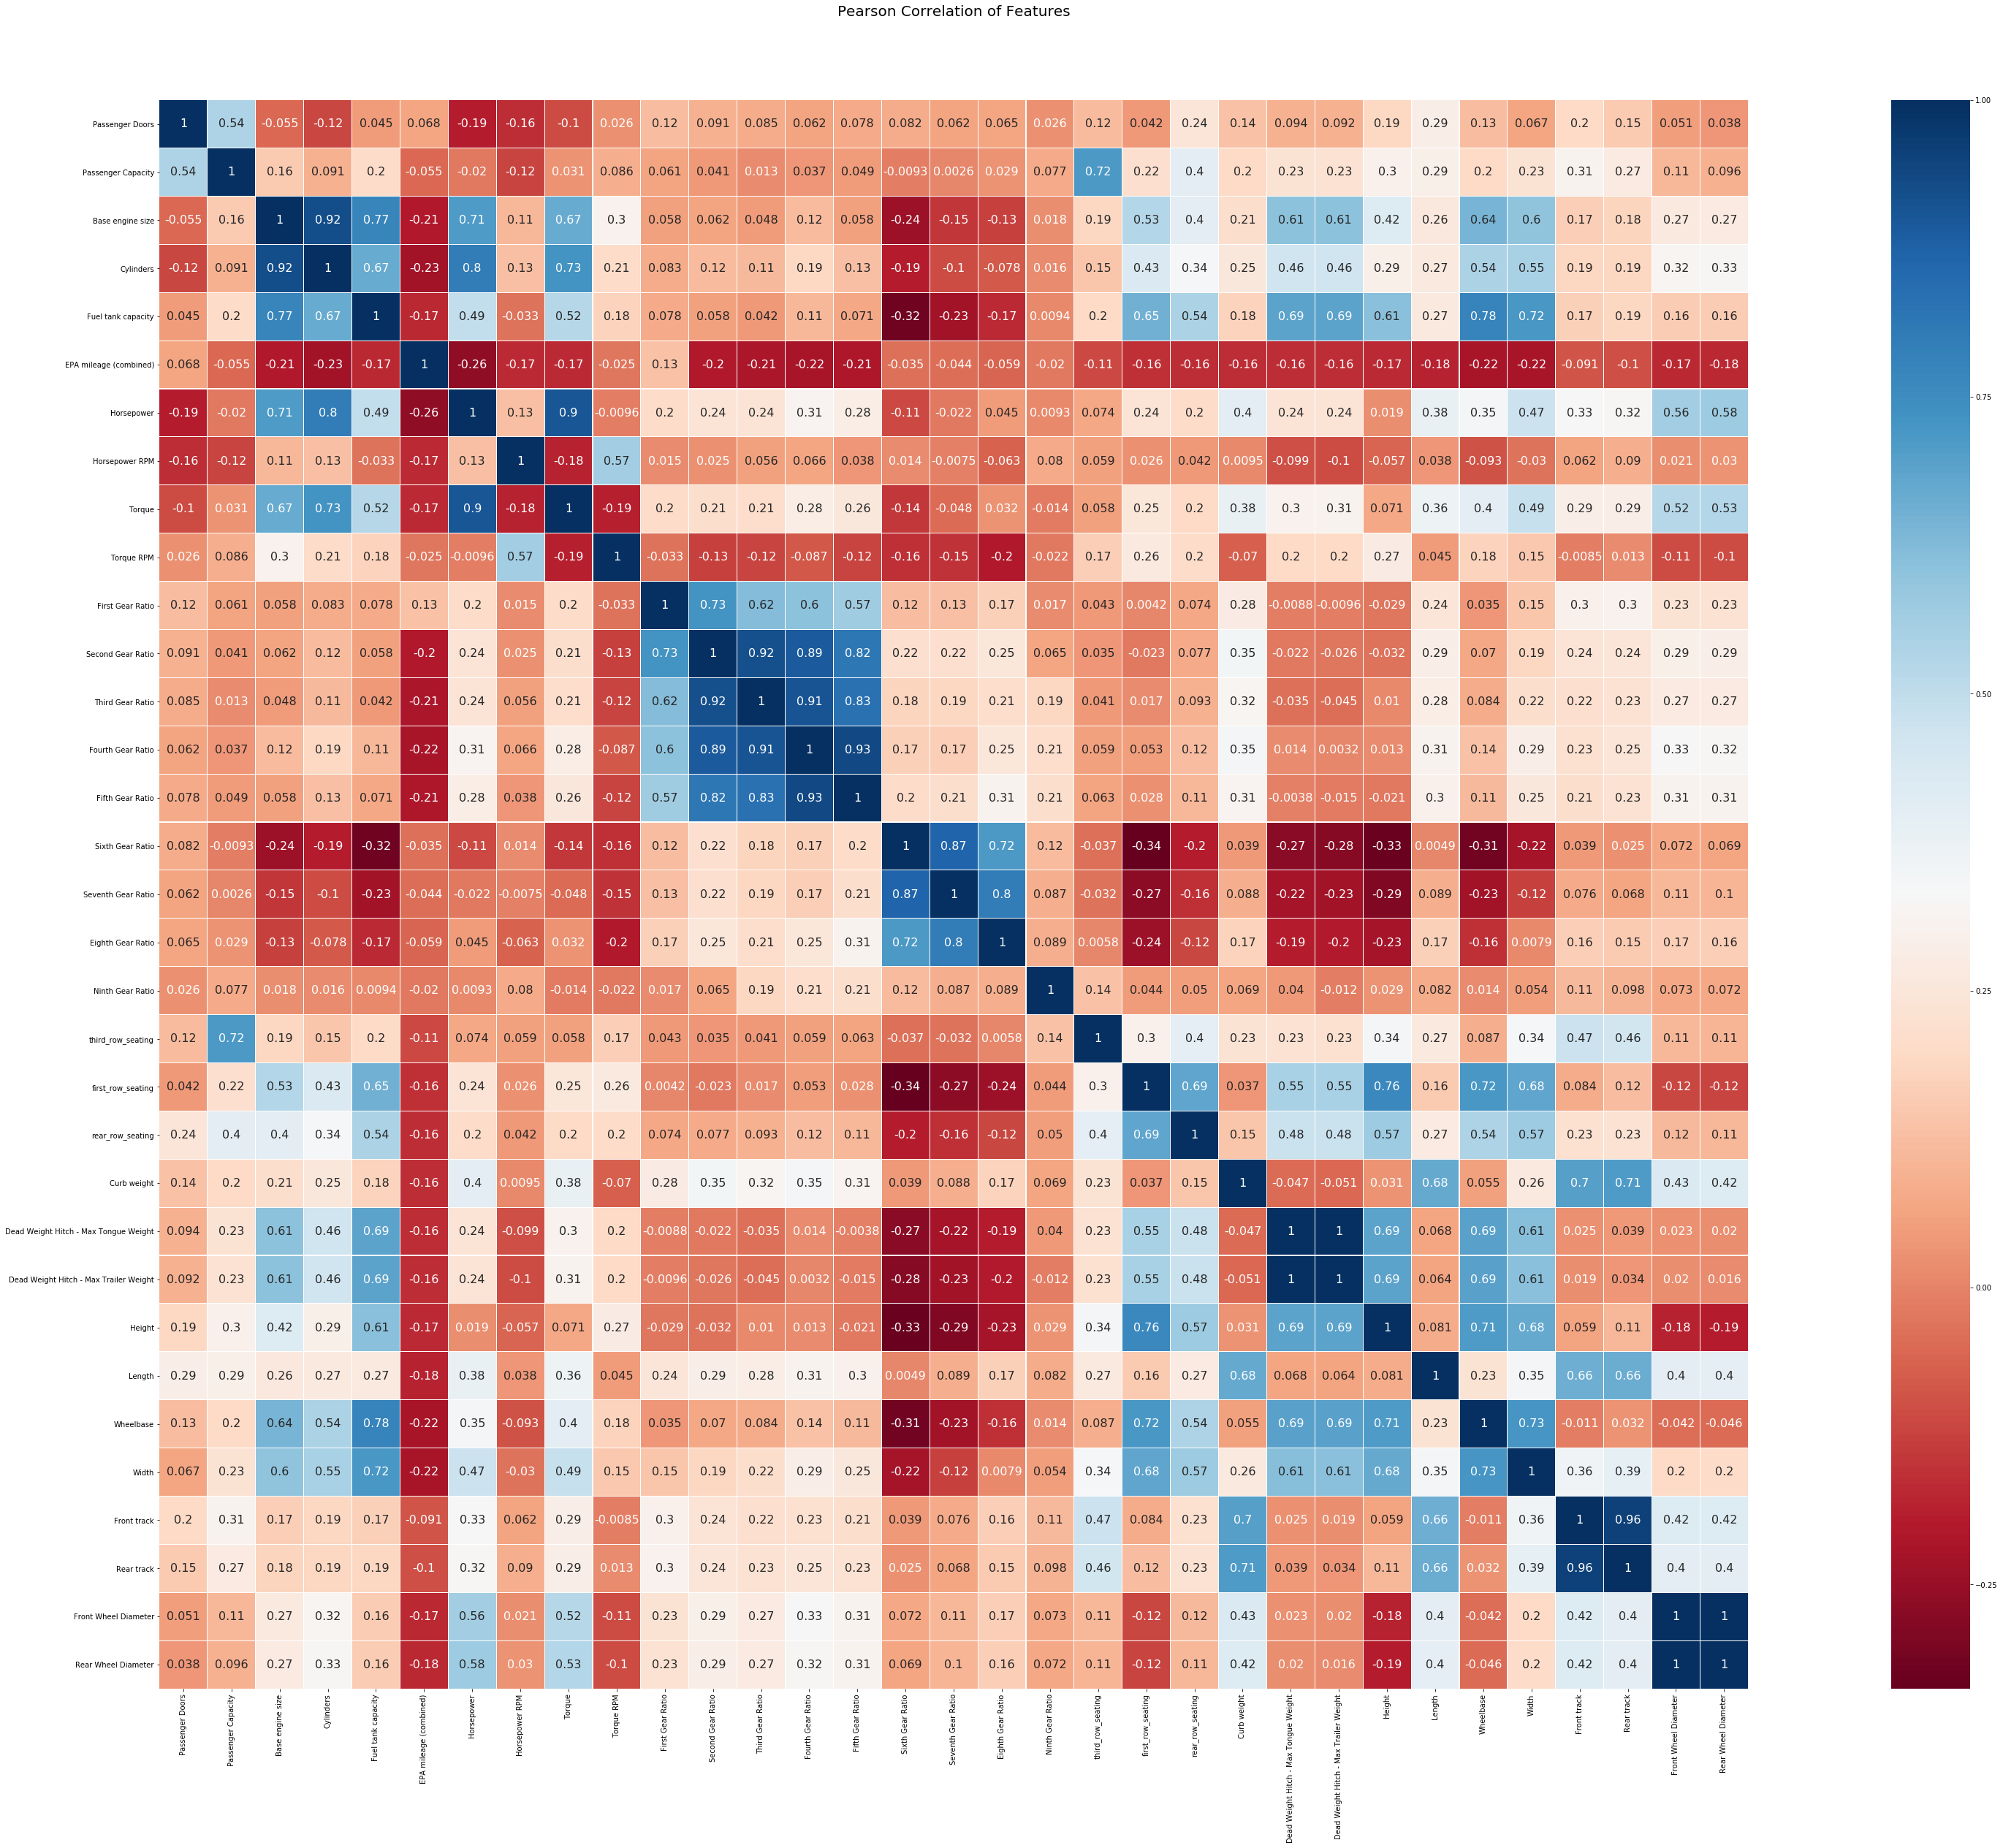

In [55]:
colormap = plt.cm.RdBu
plt.figure(figsize=(70,40))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(df_reg.fillna(method='bfill').corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
# Note that the categorical features have been neglected in the
# correlation matrix.

In [ ]:
df_reg

In [160]:
df_knn.loc[996]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [996] of <class 'int'>

In [118]:
target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isna(closest_to_target)))

NameError: name 'closest_to_target' is not defined

In [47]:
df_reg[[df_reg.all > 0]]

TypeError: '>' not supported between instances of 'method' and 'int'